In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
accounts = pd.read_csv("https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/DS%20II%20-%20Final%20Dataset.csv")
accounts

,Acc #,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age,City,Area,avg days before game ticket is purchased,Ticket Purchase Source,Distance from Stadium,Discount Usage,Days Since Last Game Attended,Most Common Game Day,Subscribed to Email List
0,59706132,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,25,Scarborough,Greater Toronto Area,2,App,31,0,158,Saturday,0
1,94828583,1,2,540.0,Defensive Ends,Downtown Toronto (Richmond/Adelaide/King),M,57,Toronto,Downtown Toronto,3,Website,11,0,157,Saturday,1
2,31566094,1,2,540.0,Defensive Ends,Scarborough (Guildwood),F,48,Scarborough,Greater Toronto Area,1,App,30,0,159,Tuesday,0
3,66750139,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,52,Scarborough,Greater Toronto Area,2,Website,23,0,124,Saturday,0
4,74126192,4,8,2184.0,Attacking Corner,Etobicoke (South Steeles),F,31,Etobicoke,Greater Toronto Area,15,App,30,0,40,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149171,14789075,4,8,1520.0,UB - Defensive End,Downtown Toronto (St. James Town),F,56,Toronto,Downtown Toronto,6,App,34,0,88,Tuesday,0
149172,37596814,2,4,760.0,UB - Defensive End,Hamilton (Waterdown),M,36,Toronto,Greater Toronto Area,2,App,32,1,159,Wednesday,0
149173,15749982,5,10,1450.0,Standing Room Only,Scarborough (Golden Mile),M,59,Scarborough,Greater Toronto Area,2,Website,5,0,128,Friday,0
149174,61411679,1,2,430.0,UB - Attacking Corner,Hamilton (Southam / Bonnington / Yeoville / Ke...,M,53,Toronto,Downtown Toronto,6,Website,42,0,9,Friday,0


In [3]:
# Dropped Account ID Variable
accounts.drop('Acc #', axis=1, inplace=True)
accounts

# note: this was dropped as it is the only categorical value in the dataset and this would be non-useful for clustering

,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age,City,Area,avg days before game ticket is purchased,Ticket Purchase Source,Distance from Stadium,Discount Usage,Days Since Last Game Attended,Most Common Game Day,Subscribed to Email List
0,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,25,Scarborough,Greater Toronto Area,2,App,31,0,158,Saturday,0
1,1,2,540.0,Defensive Ends,Downtown Toronto (Richmond/Adelaide/King),M,57,Toronto,Downtown Toronto,3,Website,11,0,157,Saturday,1
2,1,2,540.0,Defensive Ends,Scarborough (Guildwood),F,48,Scarborough,Greater Toronto Area,1,App,30,0,159,Tuesday,0
3,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,52,Scarborough,Greater Toronto Area,2,Website,23,0,124,Saturday,0
4,4,8,2184.0,Attacking Corner,Etobicoke (South Steeles),F,31,Etobicoke,Greater Toronto Area,15,App,30,0,40,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149171,4,8,1520.0,UB - Defensive End,Downtown Toronto (St. James Town),F,56,Toronto,Downtown Toronto,6,App,34,0,88,Tuesday,0
149172,2,4,760.0,UB - Defensive End,Hamilton (Waterdown),M,36,Toronto,Greater Toronto Area,2,App,32,1,159,Wednesday,0
149173,5,10,1450.0,Standing Room Only,Scarborough (Golden Mile),M,59,Scarborough,Greater Toronto Area,2,Website,5,0,128,Friday,0
149174,1,2,430.0,UB - Attacking Corner,Hamilton (Southam / Bonnington / Yeoville / Ke...,M,53,Toronto,Downtown Toronto,6,Website,42,0,9,Friday,0


### Categorical variable transformations

In [4]:
def area_categorical(x):
    if x == 'Greater Toronto Area':
        return 1
    elif x == 'Downtown Toronto':
        return 2
    elif x == 'Outside GTA':
        return 3
    else:
        return 0

In [5]:
def city_categorical(city):
    if city in ['Toronto', 'Scarborough', 'North York', 'Etobicoke', 'East York']:
        return 1  # Greater Toronto Area
    elif city in ['Downtown Toronto']:
        return 2  # Downtown Toronto
    elif city in ['Mississauga', 'Markham', 'Brampton', 'Hamilton', 'Richmond Hill', 'Vaughan']:
        return 3  # Outside GTA - Major surrounding cities
    else:
        return 4  # Other locations outside GTA

accounts['city_categorical'] = accounts['City'].apply(city_categorical)

In [6]:
def mcs_categorical(section):
    if section == 'Defensive Ends':
        return 1
    elif section == 'Attacking Corner':
        return 2
    elif section == 'Defensive Corner - Upper':
        return 3
    elif section == 'Attacking Ends':
        return 4
    elif section == 'UB - Attacking Corner':
        return 5
    elif section == 'UB - Defensive Corner':
        return 6
    elif section == 'UB - Defensive End':
        return 7
    elif section == 'UB - Attacking End':
        return 8
    elif section == 'Standing Room Only':
        return 9
    elif section == 'Blue Line':
        return 10
    elif section in ['UB - Club', 'Club Platinum', 'Club Rinkside', 'Club Gold', 'Club Glass']:
        return 11
    elif section == 'Family Zone':
        return 12
    else:
        return 0  

# Apply the function to create the categorical mapping
accounts['mcs_categorical'] = accounts['Most Common Section'].apply(mcs_categorical)

print(accounts['mcs_categorical'].value_counts())

mcs_categorical
1     21485
2     21312
3     21303
4     21245
11    19728
5      7219
6      7175
7      7124
8      7036
9      6948
10     4363
12     4238
Name: count, dtype: int64


In [7]:
def purchase_source_categorical(x):
    if x == 'App':
        return 1
    elif x == 'Website':
        return 2
    elif x == 'In-Person':
        return 3
    else:
        return 0
    
accounts['purchase_source_categorical'] = accounts['Ticket Purchase Source'].apply(purchase_source_categorical)

In [8]:
def gender_categorical(x):
    if x == 'M':
        return 1
    elif x == 'F':
        return 2
    elif x == 'N/A':
        return 3
    else:
        return 0
    
accounts['gender_categorical'] = accounts['Gender'].apply(gender_categorical)

In [9]:
def game_day_categorical(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 1
    elif day == 'Friday':
        return 2
    elif day == 'Saturday':
        return 3
    elif day == 'Sunday':
        return 4
    else:
        return 0  # Unknown or other values
    
accounts['game_day_categorical'] = accounts['Most Common Game Day'].apply(game_day_categorical)

In [10]:
def ticket_purchase_bucket(days):
    if days == 1:
        return 'Game Day'
    elif 2 <= days <= 4:
        return '1-3 Days Before'
    elif 5 <= days <= 8:
        return '1 Week Before'
    elif 9 <= days <= 30:
        return 'Over 1 Week Before'
    elif days >= 31:
        return 'Over 1 Month In-Advance'
    else:
        return 'Unknown'

accounts['Avg Purchase Time'] = accounts['avg days before game ticket is purchased'].apply(ticket_purchase_bucket)

# To see the distribution of the buckets
print(accounts['Avg Purchase Time'].value_counts())

Avg Purchase Time
1-3 Days Before            57705
1 Week Before              43523
Game Day                   26362
Over 1 Week Before         16832
Over 1 Month In-Advance     4754
Name: count, dtype: int64


In [11]:
def ticket_purchase_bucket_numeric(days):
    if days == 1:
        return 1  # Game Day
    elif 2 <= days <= 4:
        return 2  # 1-3 Days Before
    elif 5 <= days <= 8:
        return 3  # 1 Week Before
    elif 9 <= days <= 30:
        return 4  # Over 1 Week Before
    elif days >= 31:
        return 5  # Over 1 Month In-Advance
    else:
        return 0  # Unknown

accounts['Avg Purchase Time Encoded'] = accounts['avg days before game ticket is purchased'].apply(ticket_purchase_bucket_numeric)

# To see the distribution of the numerical mapping
print(accounts['Avg Purchase Time Encoded'].value_counts())

Avg Purchase Time Encoded
2    57705
3    43523
1    26362
4    16832
5     4754
Name: count, dtype: int64


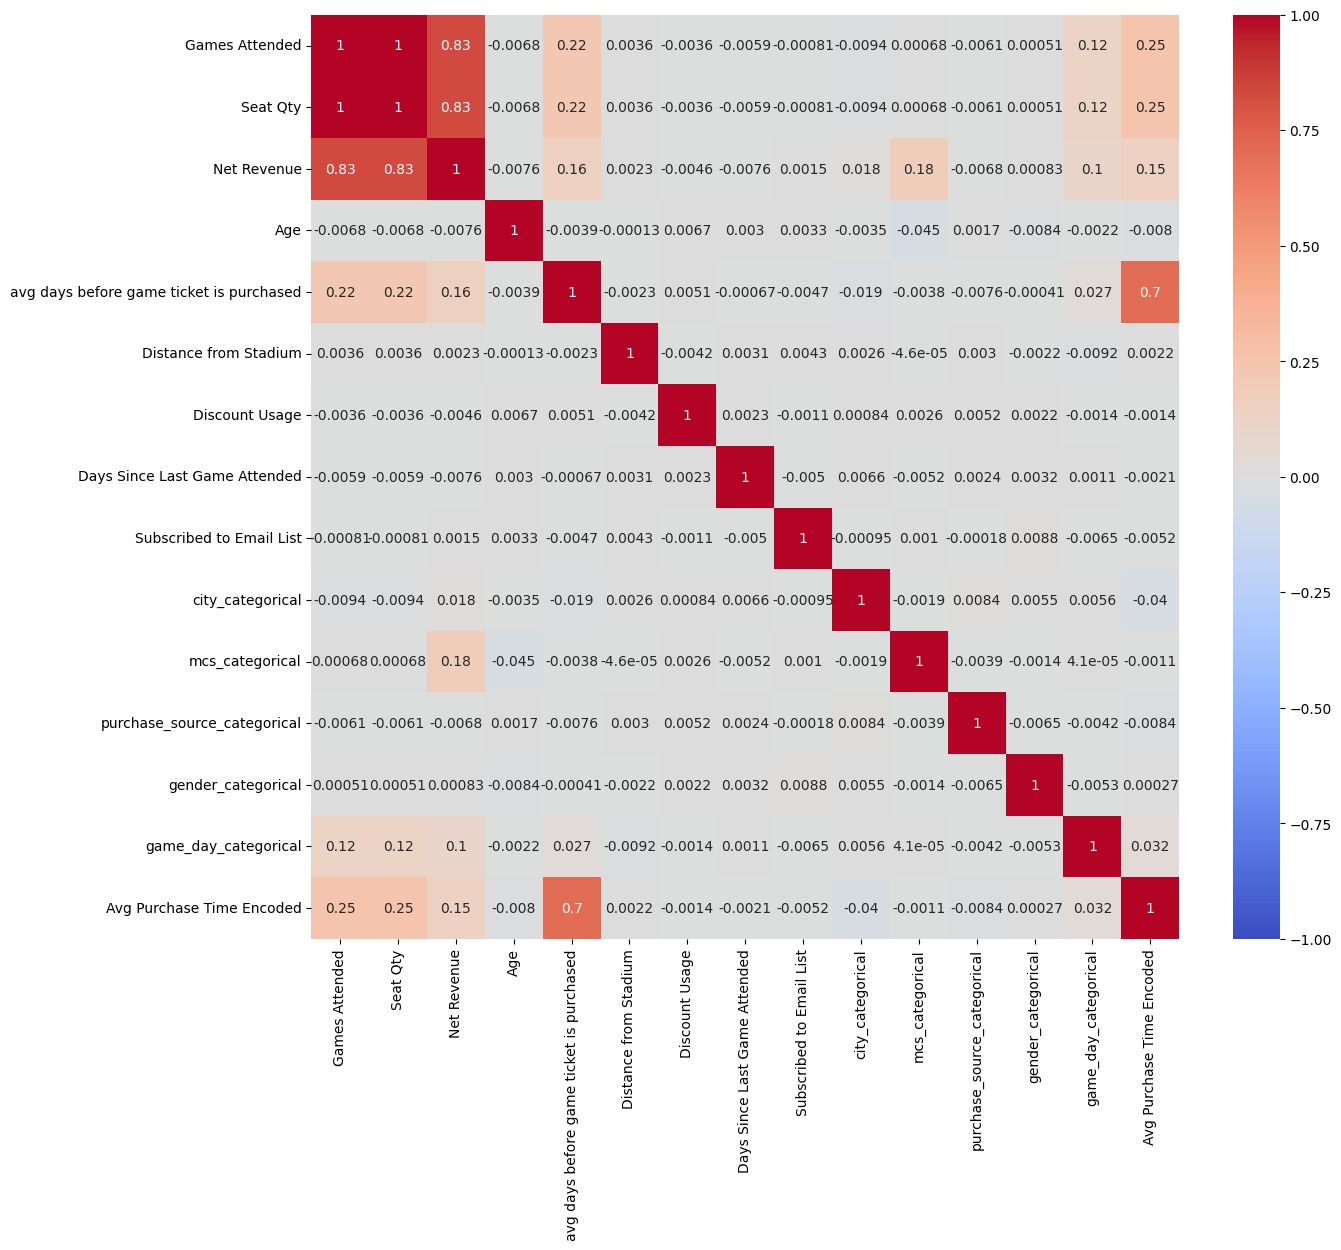

In [12]:
corr_matrix = accounts.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

## EDA

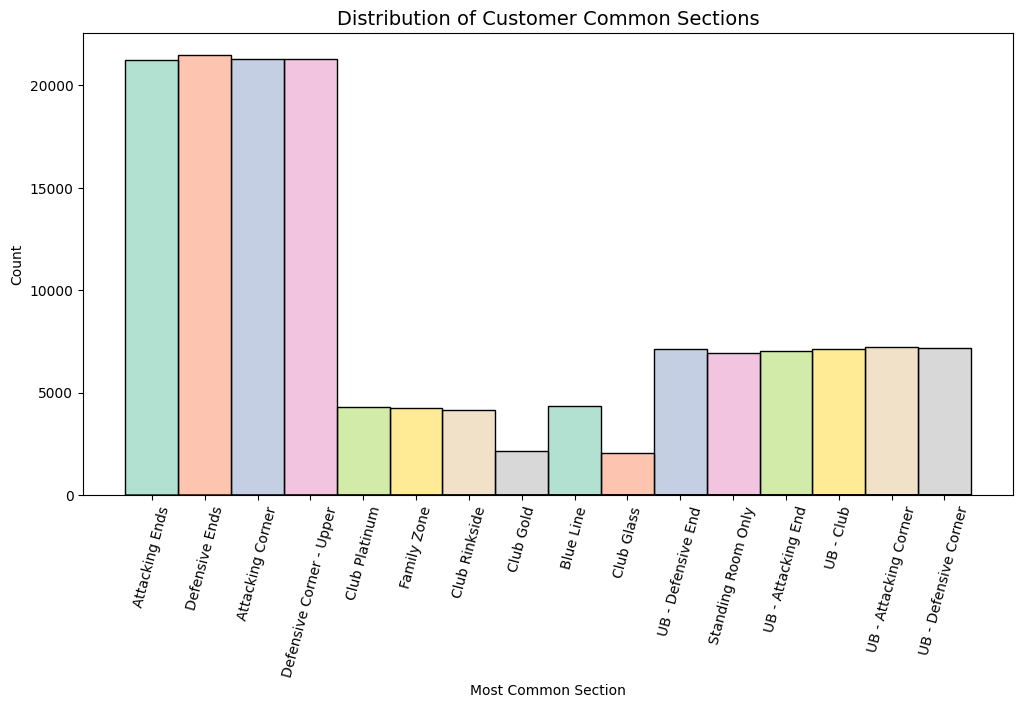

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(x=accounts['Most Common Section'], hue=accounts['Most Common Section'], palette='Set2', legend=False)
plt.xticks(rotation=75)
plt.title('Distribution of Customer Common Sections', fontsize=14)
plt.show()

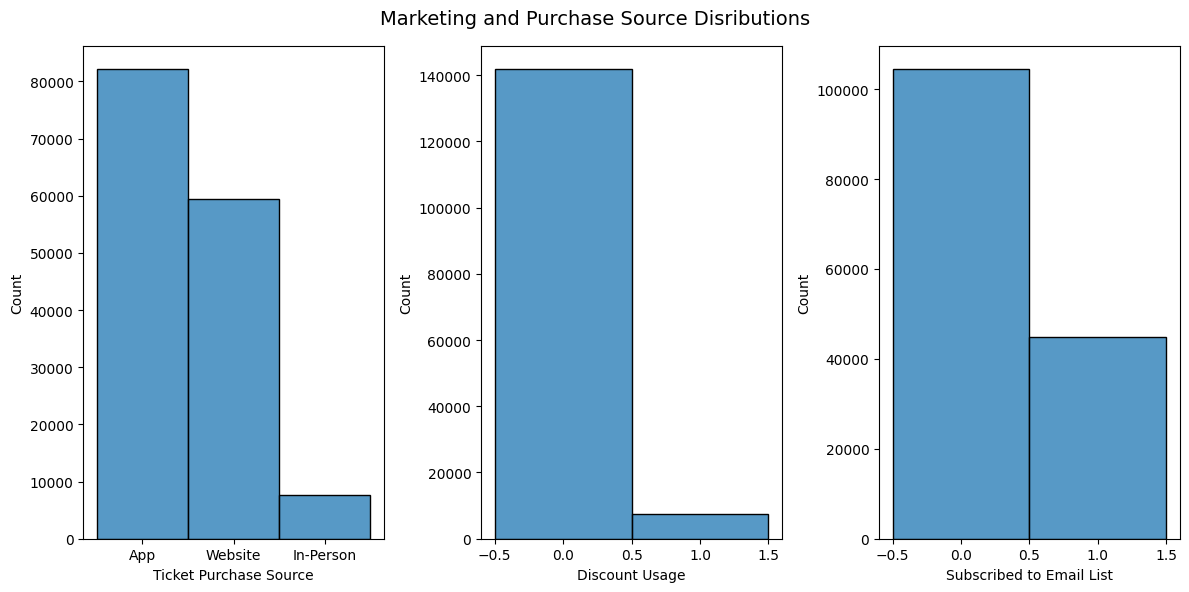

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.histplot(x=accounts['Ticket Purchase Source'], ax=axes[0])
sns.histplot(x=accounts['Discount Usage'], ax=axes[1], discrete=True)
sns.histplot(x=accounts['Subscribed to Email List'], ax=axes[2], discrete=True)

plt.suptitle('Marketing and Purchase Source Disributions', fontsize=14, ha='center')
plt.tight_layout()
plt.show()

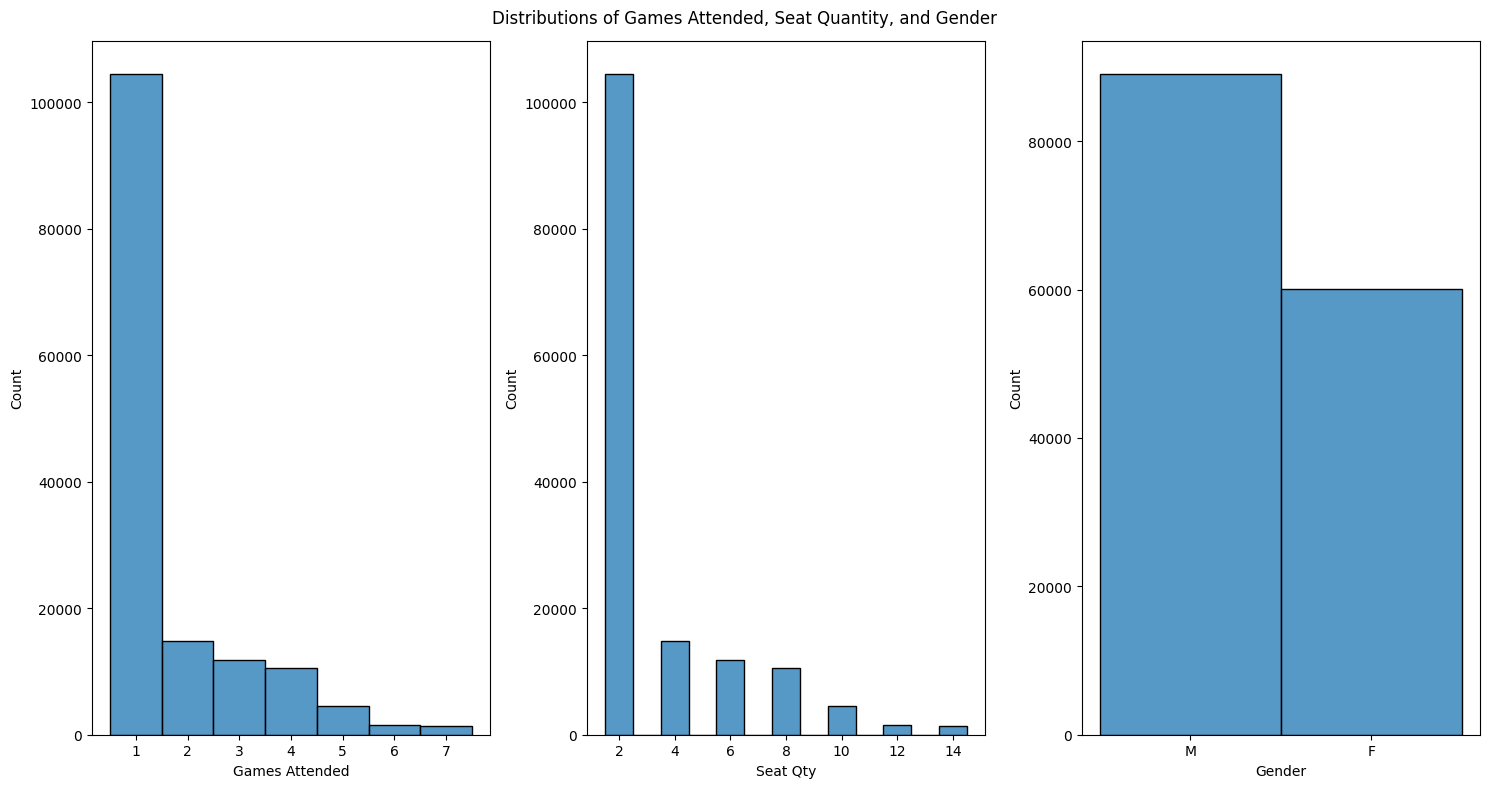

In [15]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

sns.histplot(x=accounts['Games Attended'], discrete=True, ax=axes[0])
sns.histplot(x=accounts['Seat Qty'], discrete=True, ax=axes[1])
sns.histplot(x=accounts['Gender'], ax=axes[2])

plt.suptitle('Distributions of Games Attended, Seat Quantity, and Gender')
plt.tight_layout()
plt.show()

<Axes: ylabel='Games Attended'>

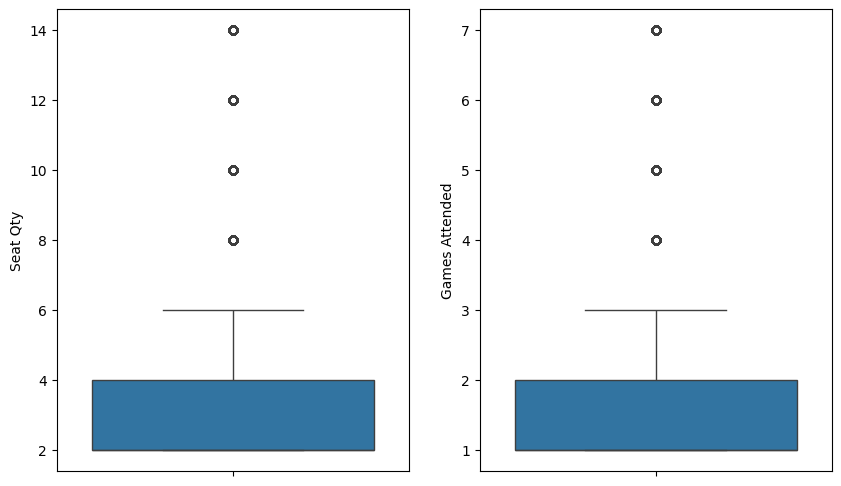

In [16]:
fig, axes = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(y=accounts['Seat Qty'], ax=axes[0])
sns.boxplot(y=accounts['Games Attended'], ax=axes[1])

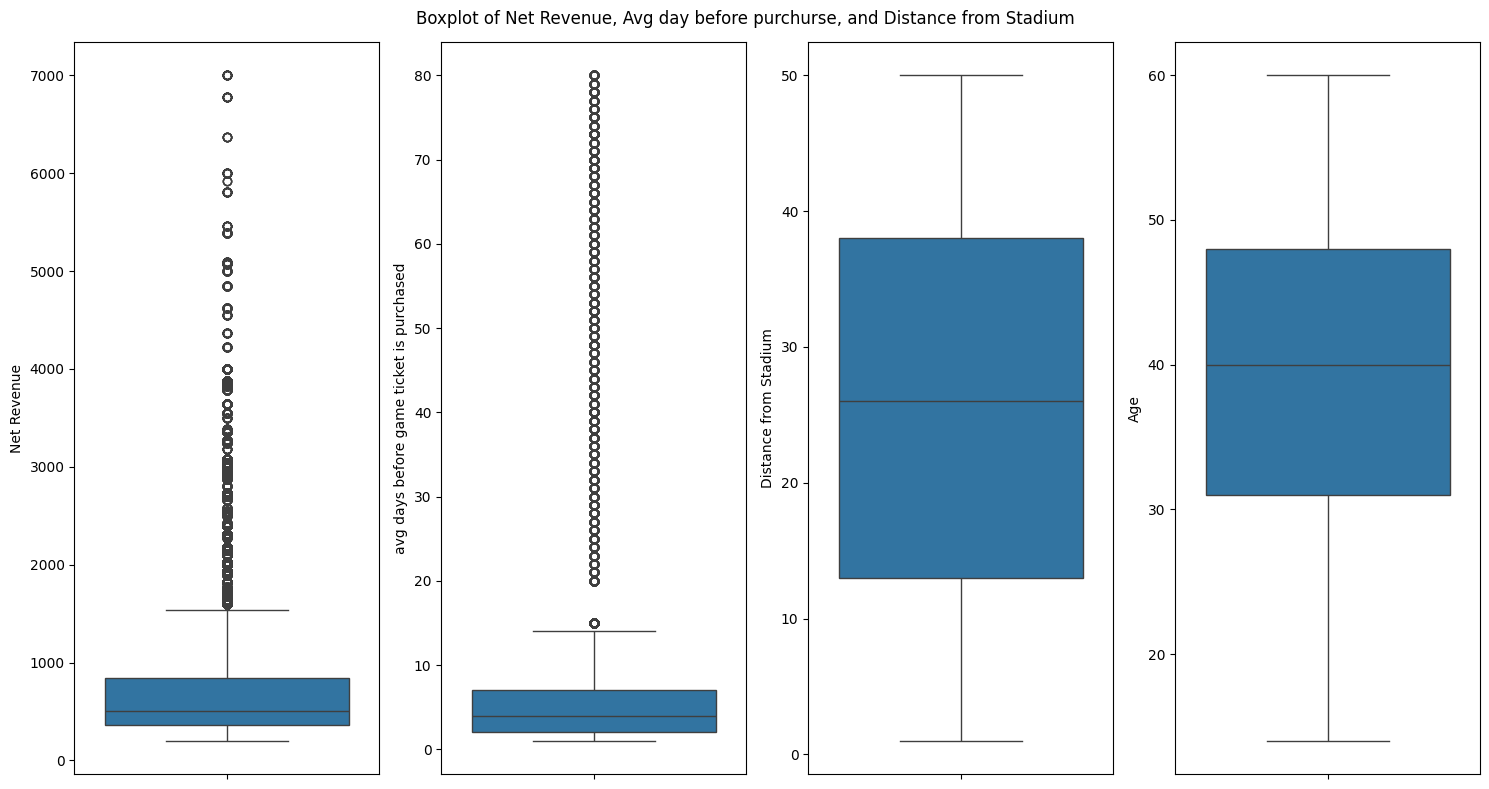

In [17]:
# Can look to winsorize the net revenue column as it has a high volume of outliers

fig, axes = plt.subplots(1, 4, figsize=(15, 8))

sns.boxplot(y=accounts['Net Revenue'], ax=axes[0])
sns.boxplot(y=accounts['avg days before game ticket is purchased'], ax=axes[1])
sns.boxplot(y=accounts['Distance from Stadium'], ax=axes[2])
sns.boxplot(y=accounts['Age'], ax=axes[3])

plt.suptitle('Boxplot of Net Revenue, Avg day before purchurse, and Distance from Stadium', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

In [18]:
total_netrevenue = accounts.groupby('Area')['Net Revenue'].sum()
total_netrevenue =  total_netrevenue.sort_values(ascending=False)

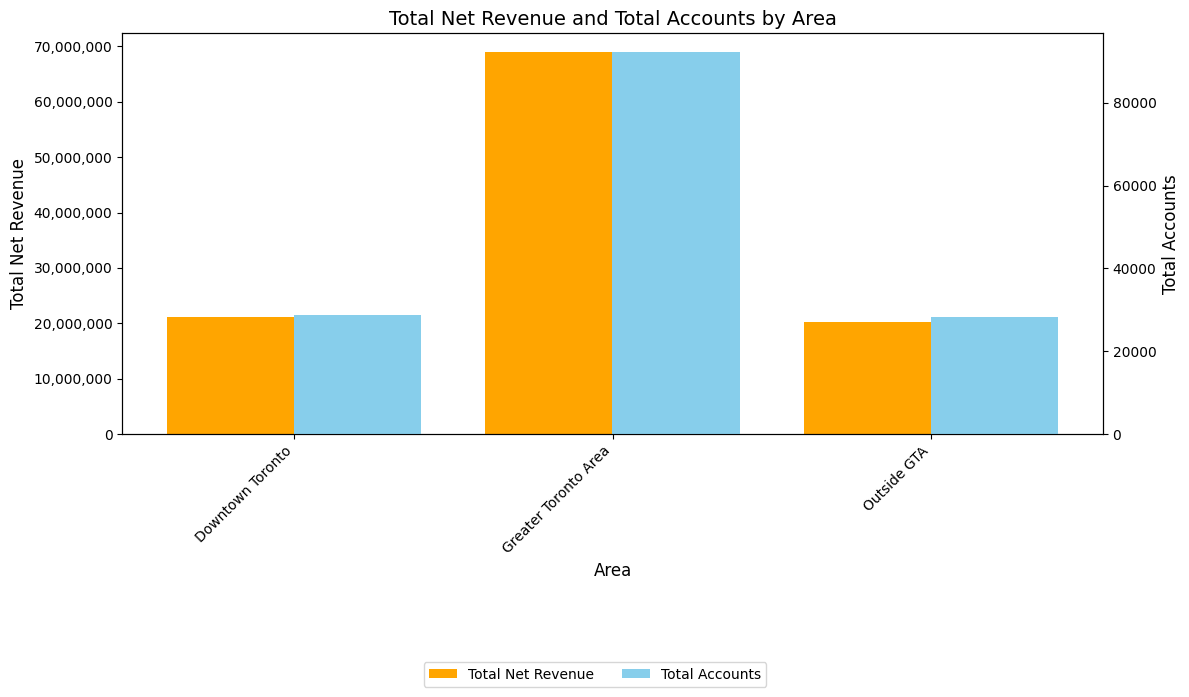

In [19]:
from matplotlib.ticker import FuncFormatter

# Group by Area to calculate totals
area_grouped = accounts.groupby("Area").agg(
    total_net_revenue=("Net Revenue", "sum"),
    total_accounts=("Games Attended", "count")
).reset_index()

# Define variables for plotting
areas = area_grouped["Area"]
total_net_revenue = area_grouped["total_net_revenue"]
total_accounts = area_grouped["total_accounts"]

# Define x positions for the bars
x = np.arange(len(areas))
width = 0.4  # Bar width

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total net revenue on the primary y-axis
bars1 = ax1.bar(x - width/2, total_net_revenue, width, label="Total Net Revenue", color="orange")
ax1.set_ylabel("Total Net Revenue", fontsize=12)
ax1.set_xlabel("Area", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(areas, rotation=45, ha="right")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Create a secondary y-axis for total accounts
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, total_accounts, width, label="Total Accounts", color="skyblue")
ax2.set_ylabel("Total Accounts", fontsize=12)

# Add a title and legend
ax1.set_title("Total Net Revenue and Total Accounts by Area", fontsize=14)
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adjust layout
plt.tight_layout()
plt.show()

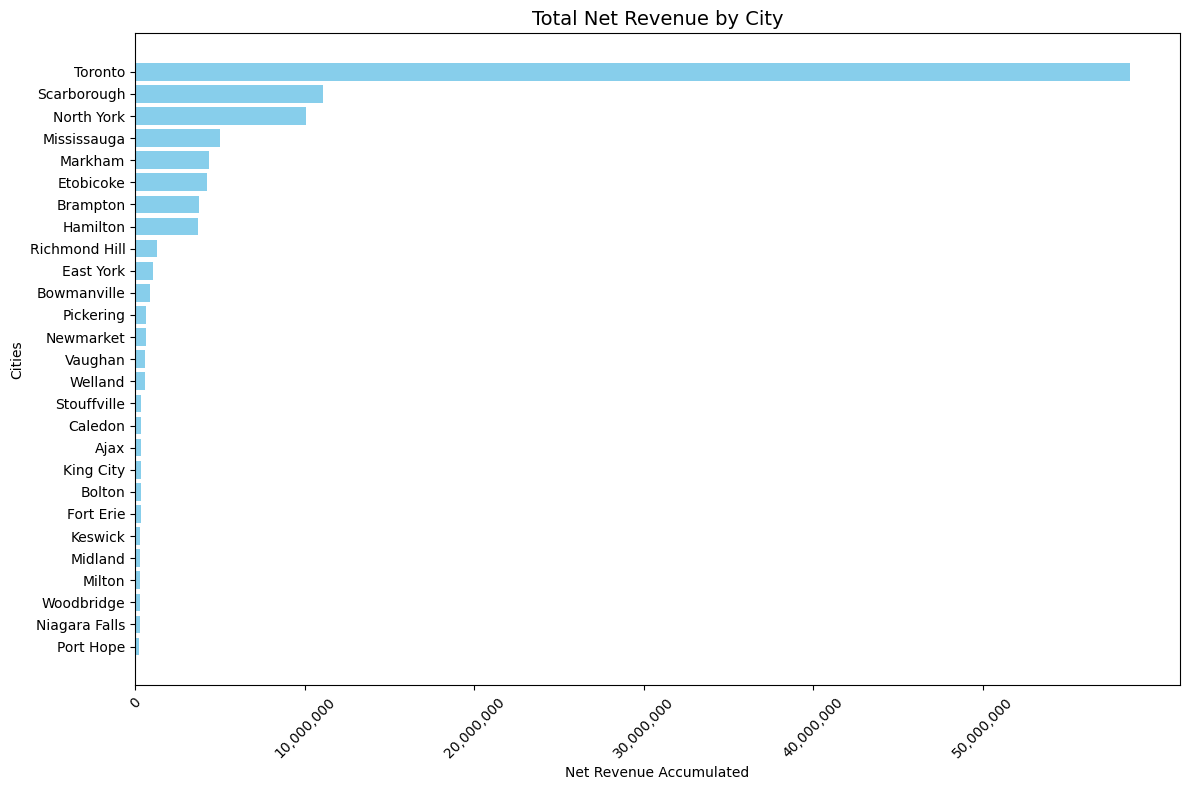

In [20]:
#Looking at total revenue by city

total_netrevenue = accounts.groupby('City')['Net Revenue'].sum()
total_netrevenue =  total_netrevenue.sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.barh(total_netrevenue.index, total_netrevenue.values, color='skyblue')
plt.xlabel('Net Revenue Accumulated')
plt.ylabel('Cities')
plt.title('Total Net Revenue by City', fontsize=14)

x_ticks = np.arange(0, total_netrevenue.values.max() + 1, step=10000000)  # Adjust the step size as needed
plt.xticks(x_ticks, labels=[f"{int(x):,}" for x in x_ticks], fontsize=10, rotation=45)


plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Winsorization of the Variables

In [21]:
accounts['Net Revenue'] = np.clip(accounts['Net Revenue'], None, 4000)
accounts['Seat Qty'] = np.clip(accounts['Seat Qty'], None, 10)
accounts['Games Attended'] = np.clip(accounts['Games Attended'], None, 5)

<Axes: ylabel='Games Attended'>

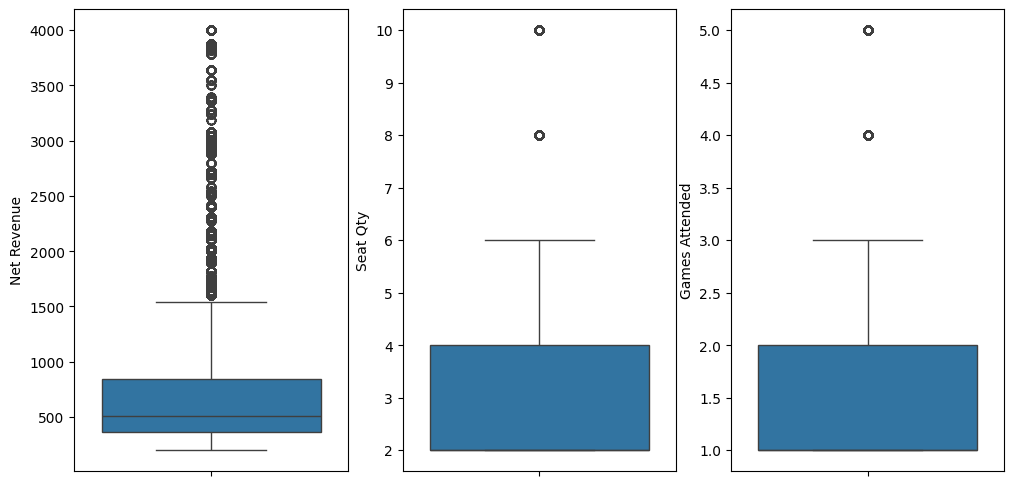

In [22]:
#Visualizations after winsorization

fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.boxplot(y=accounts['Net Revenue'], ax=axes[0])
sns.boxplot(y=accounts['Seat Qty'], ax=axes[1])
sns.boxplot(y=accounts['Games Attended'], ax=axes[2])

### Feature Engineering

In [23]:
# Calculate Average Revenue Per Seat
accounts['Avg Revenue Per Seat'] = accounts['Net Revenue'] / accounts['Seat Qty']

# Calculate Average Revenue Per Game
accounts['Avg Revenue Per Game'] = accounts['Net Revenue'] / accounts['Games Attended']


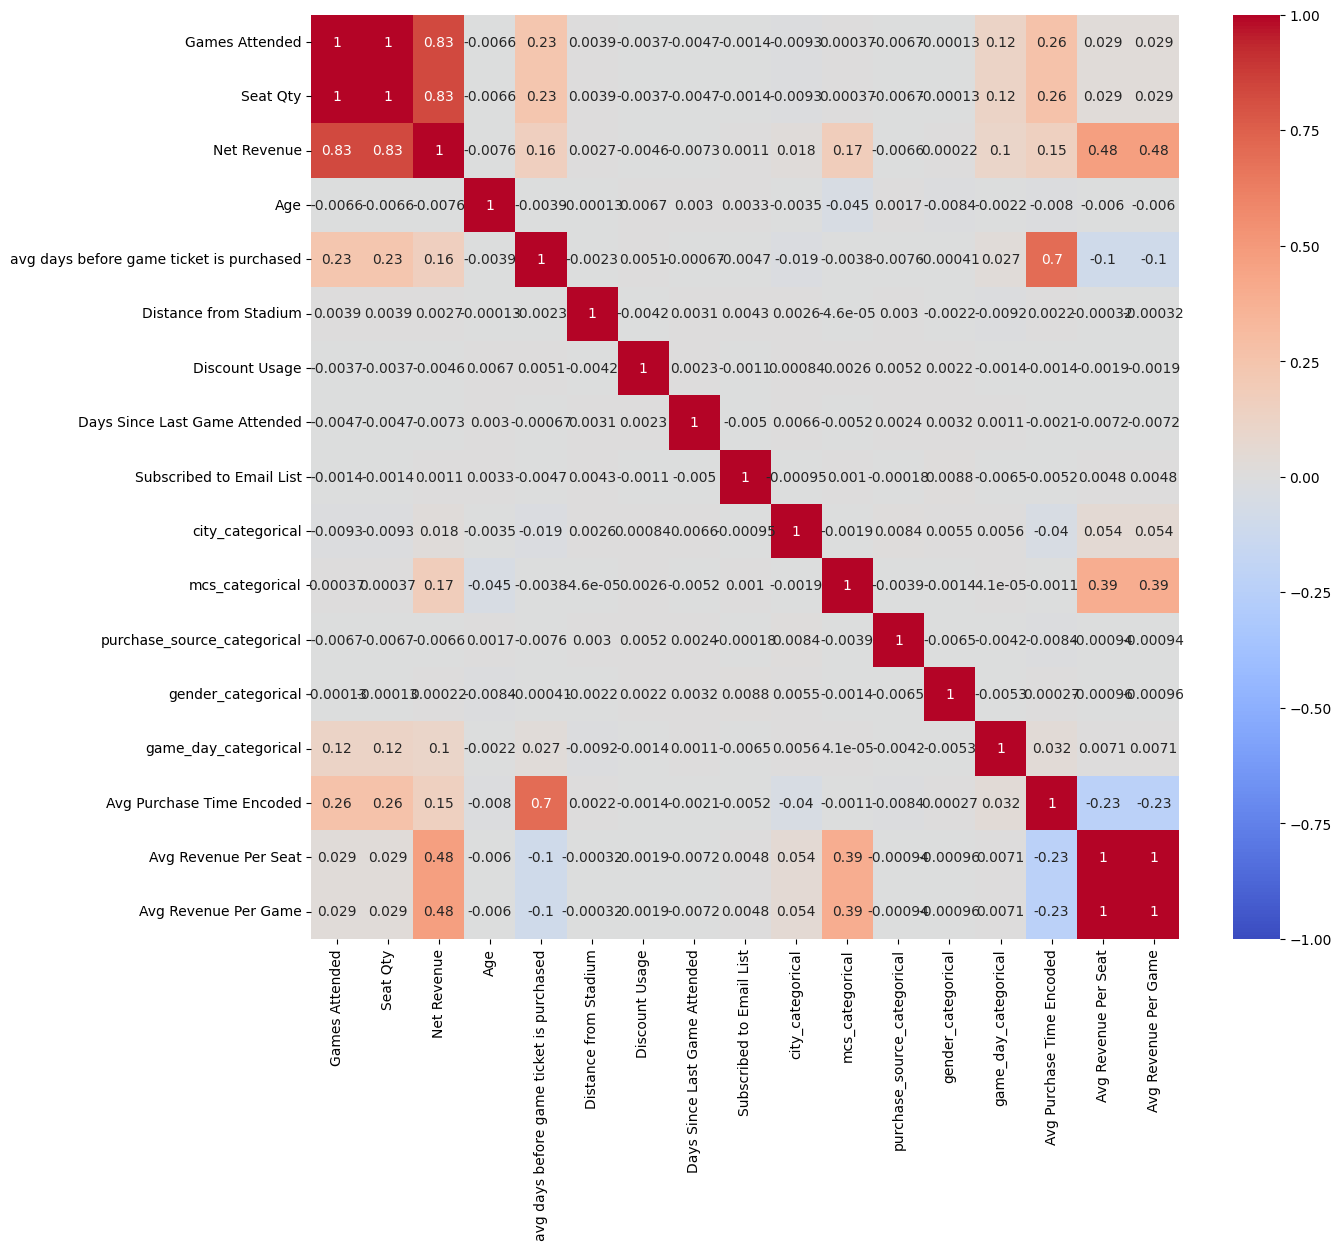

In [24]:
corr_matrix = accounts.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

## Model Selection

In [25]:
accounts_final = accounts.drop(['Most Common Section','Region', 'City', 'Area', 
                                'Ticket Purchase Source', 'Most Common Game Day', 
                                'Gender', 'city_categorical','avg days before game ticket is purchased',
                                'Avg Purchase Time', 'purchase_source_categorical', 'game_day_categorical',
                                'gender_categorical','Seat Qty','Avg Revenue Per Seat'], axis=1)

In [26]:
accounts_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149176 entries, 0 to 149175
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Games Attended                 149176 non-null  int64  
 1   Net Revenue                    149176 non-null  float64
 2   Age                            149176 non-null  int64  
 3   Distance from Stadium          149176 non-null  int64  
 4   Discount Usage                 149176 non-null  int64  
 5   Days Since Last Game Attended  149176 non-null  int64  
 6   Subscribed to Email List       149176 non-null  int64  
 7   mcs_categorical                149176 non-null  int64  
 8   Avg Purchase Time Encoded      149176 non-null  int64  
 9   Avg Revenue Per Game           149176 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 11.4 MB


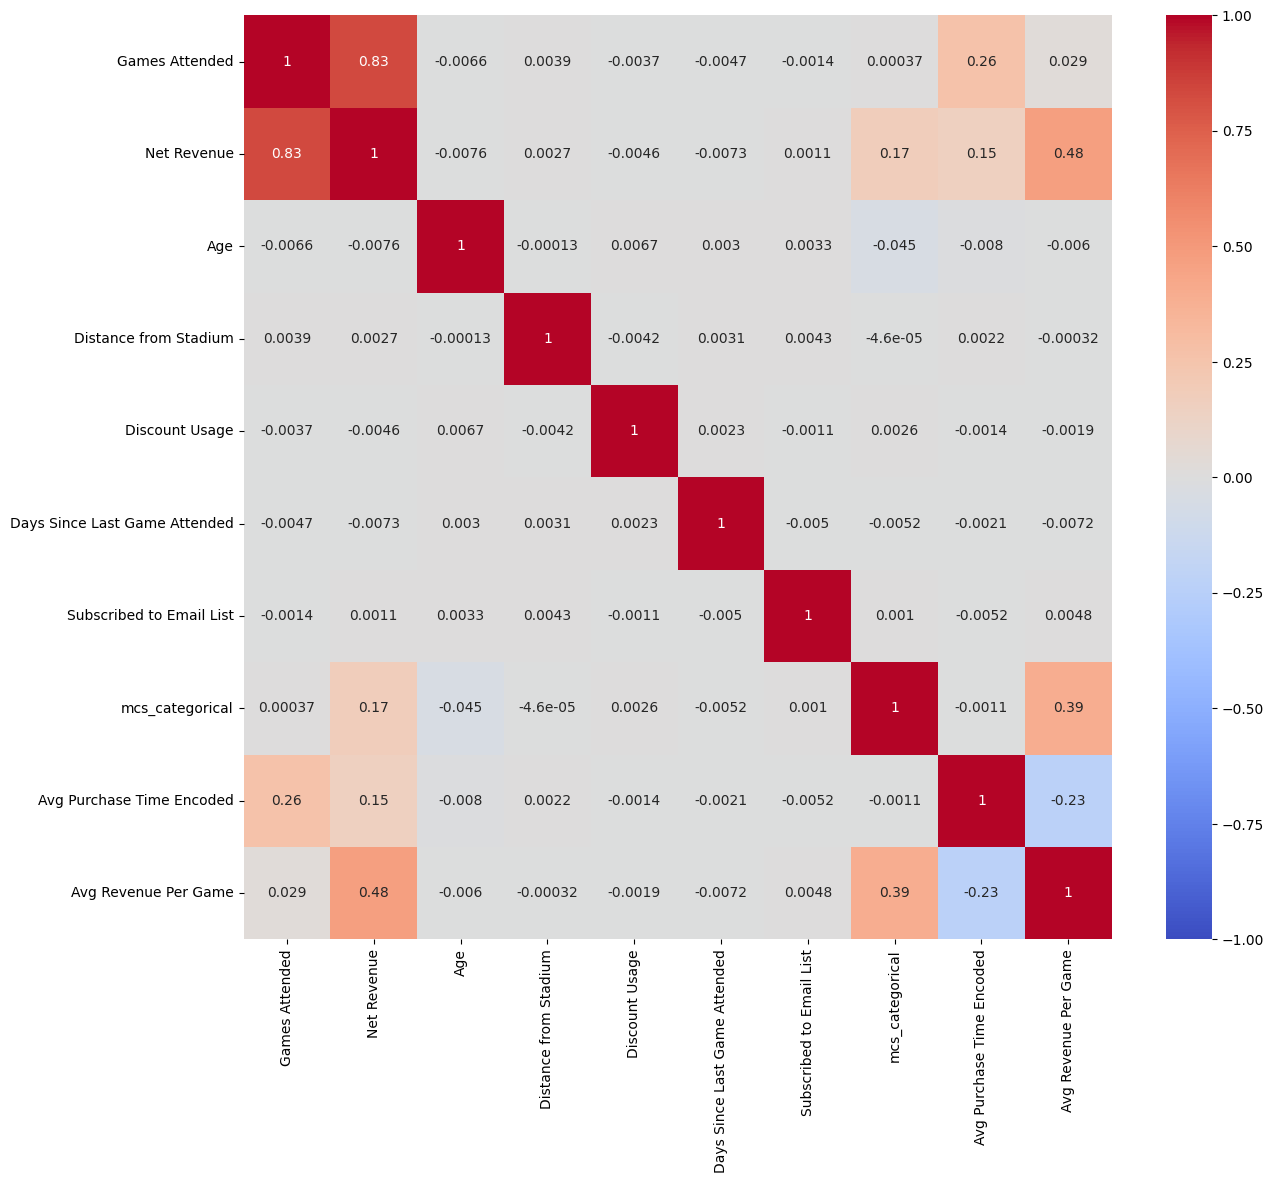

In [27]:
corr_matrix = accounts_final.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [28]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(accounts_final)

minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(accounts_final)

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(accounts_final)

# Model of Choice

### Agglomerative Clustering

### Model & Results

To form the characteristics, the numerical columns were calculated using the mean while the categorical features were calculated using the most frequent value to give a more accurate portrayal of the clusters.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from collections import Counter

# Updated categorical mappings
mcs_mapping = {
    1: 'Defensive Ends', 2: 'Attacking Corner', 3: 'Defensive Corner - Upper',
    4: 'Attacking Ends', 5: 'UB - Attacking Corner', 6: 'UB - Defensive Corner',
    7: 'UB - Defensive End', 8: 'UB - Attacking End', 9: 'Standing Room Only',
    10: 'Blue Line', 11: 'Club', 12: 'Family Zone', 0: 'Unknown'
}
area_mapping = {
    1: 'Greater Toronto Area', 2: 'Downtown Toronto', 3: 'Outside GTA', 0: 'Unknown'
}
email_discount_mapping = {1: 'Yes', 0: 'No'}
avg_purchase_time_encoded_mapping = {
    1: 'Game Day', 2: '1–3 Days Before', 3: '1 Week Before',
    4: 'Over 1 Week Before', 5: 'Over 1 Month In-Advance', 0: 'Unknown'
}

# Step 1: Scaling and Sampling the Data
def scale_and_sample(data, sample_size=10000):
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(data)
    if scaled_data.shape[0] > sample_size:
        sampled_indices = np.random.choice(scaled_data.shape[0], sample_size, replace=False)
        scaled_data = scaled_data[sampled_indices, :]
    return scaler, scaled_data

# Step 2: Perform Agglomerative Clustering
def perform_agglomerative_clustering(data, n_clusters=3, linkage='complete'):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = clusterer.fit_predict(data)
    return labels + 1  # Increment cluster labels to start at 1

# Step 3: Inverse Transform and Format Cluster Characteristics
def calculate_cluster_characteristics(original_scaled_data, original_data, labels, scaler, feature_names):
    # Inverse transform to original scale
    original_scale_data = scaler.inverse_transform(original_scaled_data)
    
    # Create a DataFrame with labels
    data_with_clusters = pd.DataFrame(original_scale_data, columns=feature_names)
    data_with_clusters['Cluster'] = labels  # Use incremented labels directly
    
    # Calculate mean values for numerical features
    cluster_characteristics = data_with_clusters.groupby('Cluster').mean()

    # Add cluster sizes
    cluster_sizes = data_with_clusters['Cluster'].value_counts().sort_index()
    cluster_characteristics['Cluster Size'] = cluster_sizes.values

    # Process categorical and binary columns
    for column, mapping in [
        ('mcs_categorical', mcs_mapping),
        ('area_categorical', area_mapping),
        ('Subscribed to Email List', email_discount_mapping),
        ('Discount Usage', email_discount_mapping),
        ('Avg Purchase Time Encoded', avg_purchase_time_encoded_mapping)
    ]:
        if column in data_with_clusters.columns:
            most_frequent_values = (
                data_with_clusters.groupby('Cluster')[column]
                .agg(lambda x: Counter(x).most_common(1)[0][0])  # Most common value
                .map(mapping)  # Map to categorical value
            )
            cluster_characteristics[column] = most_frequent_values

    # Format numerical columns
    for col in cluster_characteristics.columns:
        if col in ['Net Revenue', 'Avg Revenue Per Seat', 'Avg Revenue Per Game']:
            cluster_characteristics[col] = cluster_characteristics[col].round(2)  # Round to nearest hundredth
        elif cluster_characteristics[col].dtype != 'object':  # Exclude non-numerical columns
            cluster_characteristics[col] = cluster_characteristics[col].round(0).astype(int)  # Round to nearest whole number

    # Add all features and ensure the format matches the desired layout
    cluster_characteristics = cluster_characteristics.T
    cluster_characteristics.columns = [f"Cluster {col}" for col in cluster_characteristics.columns]
    cluster_characteristics.reset_index(inplace=True)
    cluster_characteristics.rename(columns={'index': 'Feature'}, inplace=True)

    return cluster_characteristics

# Step 4: 3D PCA Visualization
def visualize_agglomerative_clusters_with_pca(data, labels, title, n_clusters):
    # Perform PCA for visualization
    pca = PCA(n_components=3)
    pca_3d_data = pca.fit_transform(data)

    # Use Plotly for 3D visualization
    fig = go.Figure()
    unique_labels = set(labels)
    colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFC300', '#FF33A1', '#33FFF0']
    
    for label in unique_labels:
        cluster_indices = (labels == label)
        fig.add_trace(go.Scatter3d(
            x=pca_3d_data[cluster_indices, 0],
            y=pca_3d_data[cluster_indices, 1],
            z=pca_3d_data[cluster_indices, 2],
            mode='markers',
            marker=dict(size=5, color=colors[label % len(colors)], opacity=0.8),
            name=f"Cluster {label} (Size: {sum(cluster_indices)})"
        ))

    fig.update_layout(
        scene=dict(
            xaxis_title="PCA Component 1",
            yaxis_title="PCA Component 2",
            zaxis_title="PCA Component 3"
        ),
        title=f"{title} (n_clusters={n_clusters}) - 3D PCA",
        height=800
    )
    fig.show()

# Step 5: Integration
def analyze_agglomerative_clustering(data, sample_size=10000, n_clusters=3, linkage='complete', title="Agglomerative Clustering Analysis"):
    feature_names = data.columns  # Save feature names
    scaler, scaled_data = scale_and_sample(data, sample_size=sample_size)  # Scale and sample
    labels = perform_agglomerative_clustering(scaled_data, n_clusters=n_clusters, linkage=linkage)  # Cluster
    cluster_characteristics = calculate_cluster_characteristics(scaled_data, data, labels, scaler, feature_names)  # Analyze
    visualize_agglomerative_clusters_with_pca(scaled_data, labels, title, n_clusters)  # Visualize
    return cluster_characteristics

# Execution
try:
    cluster_characteristics = analyze_agglomerative_clustering(
        accounts_final, sample_size=10000, n_clusters=3, linkage='complete', 
        title="Agglomerative Clustering on Robust Data"
    )
    print(cluster_characteristics.to_string(index=False))
except Exception as e:
    print(f"Error: {e}")

                      Feature            Cluster 1            Cluster 2            Cluster 3
               Games Attended                    1                    5                    3
                  Net Revenue               560.07               2750.4              1398.08
                          Age                   39                   39                   38
        Distance from Stadium                   26                   26                   25
               Discount Usage                   No                   No                   No
Days Since Last Game Attended                   94                  100                   92
     Subscribed to Email List                   No                   No                   No
             area_categorical Greater Toronto Area Greater Toronto Area Greater Toronto Area
              mcs_categorical     Attacking Corner                 Club       Defensive Ends
    Avg Purchase Time Encoded      1–3 Days Before   Over 1 Week Befor